<a href="https://colab.research.google.com/github/sammed02/Prepinsta-Winter-internship/blob/main/Wintern_Internship_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('/content/cars_ds_final.csv',index_col=0)
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("number of rows " ,df.shape[0])
print("number of cols " ,df.shape[1])

number of rows  1276
number of cols  140


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()


Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [ ]:
null_percentage = df.isna().mean() * 100
cols_to_drop = null_percentage[null_percentage > 60].index

In [ ]:
df = df.drop(cols_to_drop,axis = 1)

In [ ]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'iPod_Compatibility', 'Cooled_Glove_Box',
       'Turbocharger', 'ISOFIX_(Child-Seat_Mount)', 'Leather_Wrapped_Steering',
       'Cruise_Control'],
      dtype='object', length=108)

In [ ]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Leather_Wrapped_Steering,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
null_exists = df.isna().mean()*100
cols_to_impute =  null_exists[null_exists>0].index

In [ ]:
for col in cols_to_impute:
  imputer = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
  df[col] = imputer.fit_transform(df[[col]])

In [ ]:
df

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Leather_Wrapped_Steering,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Columns: 108 entries, Make to Cruise_Control
dtypes: float64(5), object(103)
memory usage: 1.1+ MB


In [ ]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','')
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','')

<ipython-input-154-23e6928f12b1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','')


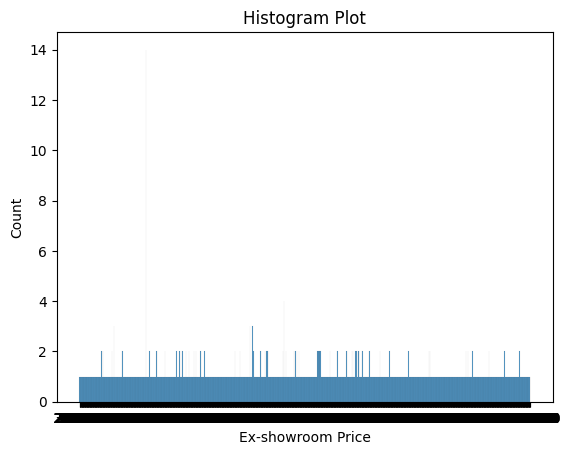

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain')

sns.histplot(df['Ex-Showroom_Price'])
plt.xlabel('Ex-showroom Price')
plt.title('Histogram Plot')
plt.show()

In [ ]:

for col in df.columns:
  print(col)

Make
Model
Variant
Ex-Showroom_Price
Displacement
Cylinders
Valves_Per_Cylinder
Drivetrain
Cylinder_Configuration
Emission_Norm
Engine_Location
Fuel_System
Fuel_Tank_Capacity
Fuel_Type
Height
Length
Width
Body_Type
Doors
City_Mileage
ARAI_Certified_Mileage
Kerb_Weight
Gears
Ground_Clearance
Front_Brakes
Rear_Brakes
Front_Suspension
Rear_Suspension
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power_Steering
Power_Windows
Keyless_Entry
Power
Torque
Odometer
Speedometer
Tachometer
Tripmeter
Seating_Capacity
Seats_Material
Type
Wheelbase
Wheels_Size
Start_/_Stop_Button
12v_Power_Outlet
Audiosystem
Aux-in_Compatibility
Average_Fuel_Consumption
Basic_Warranty
Bluetooth
Boot-lid_Opener
Boot_Space
CD_/_MP3_/_DVD_Player
Central_Locking
Child_Safety_Locks
Clock
Cup_Holders
Distance_to_Empty
Door_Pockets
Engine_Malfunction_Light
Extended_Warranty
FM_Radio
Fuel-lid_Opener
Fuel_Gauge
Handbrake
Instrument_Console
Low_Fuel_Warning
Minimum_Turning_Radius
Multifunction_Display
Sun_Visor
Thir

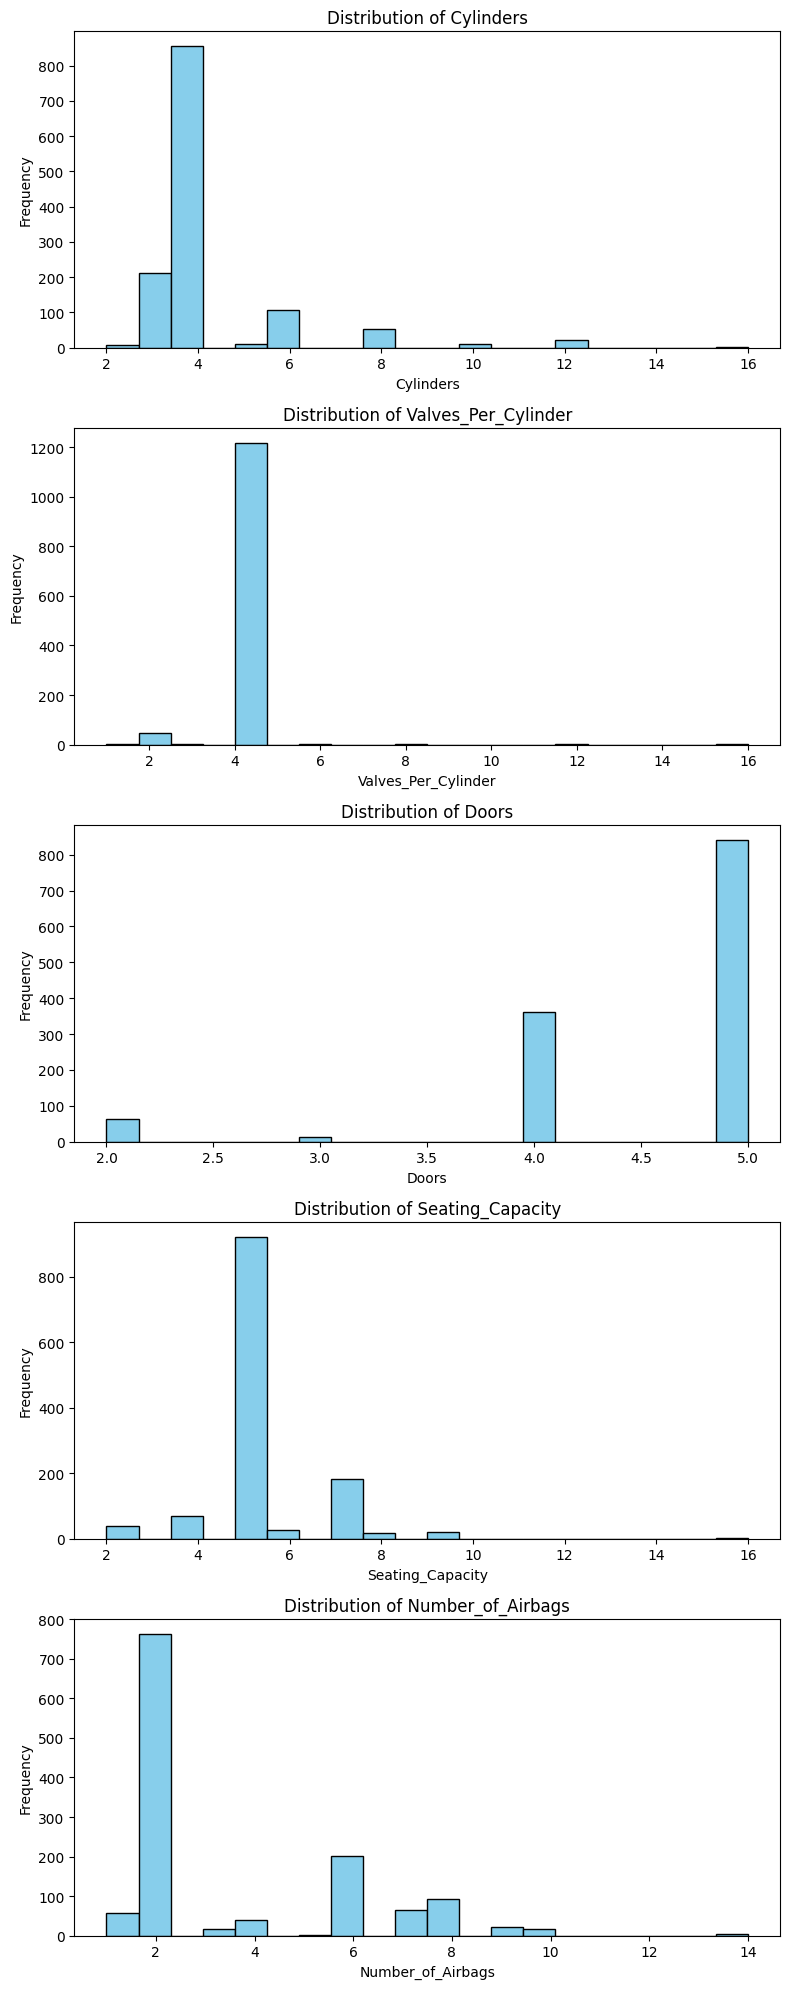

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
num_plots = len(categorical_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))
for i, col in enumerate(categorical_cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-158-a85250a50d50>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


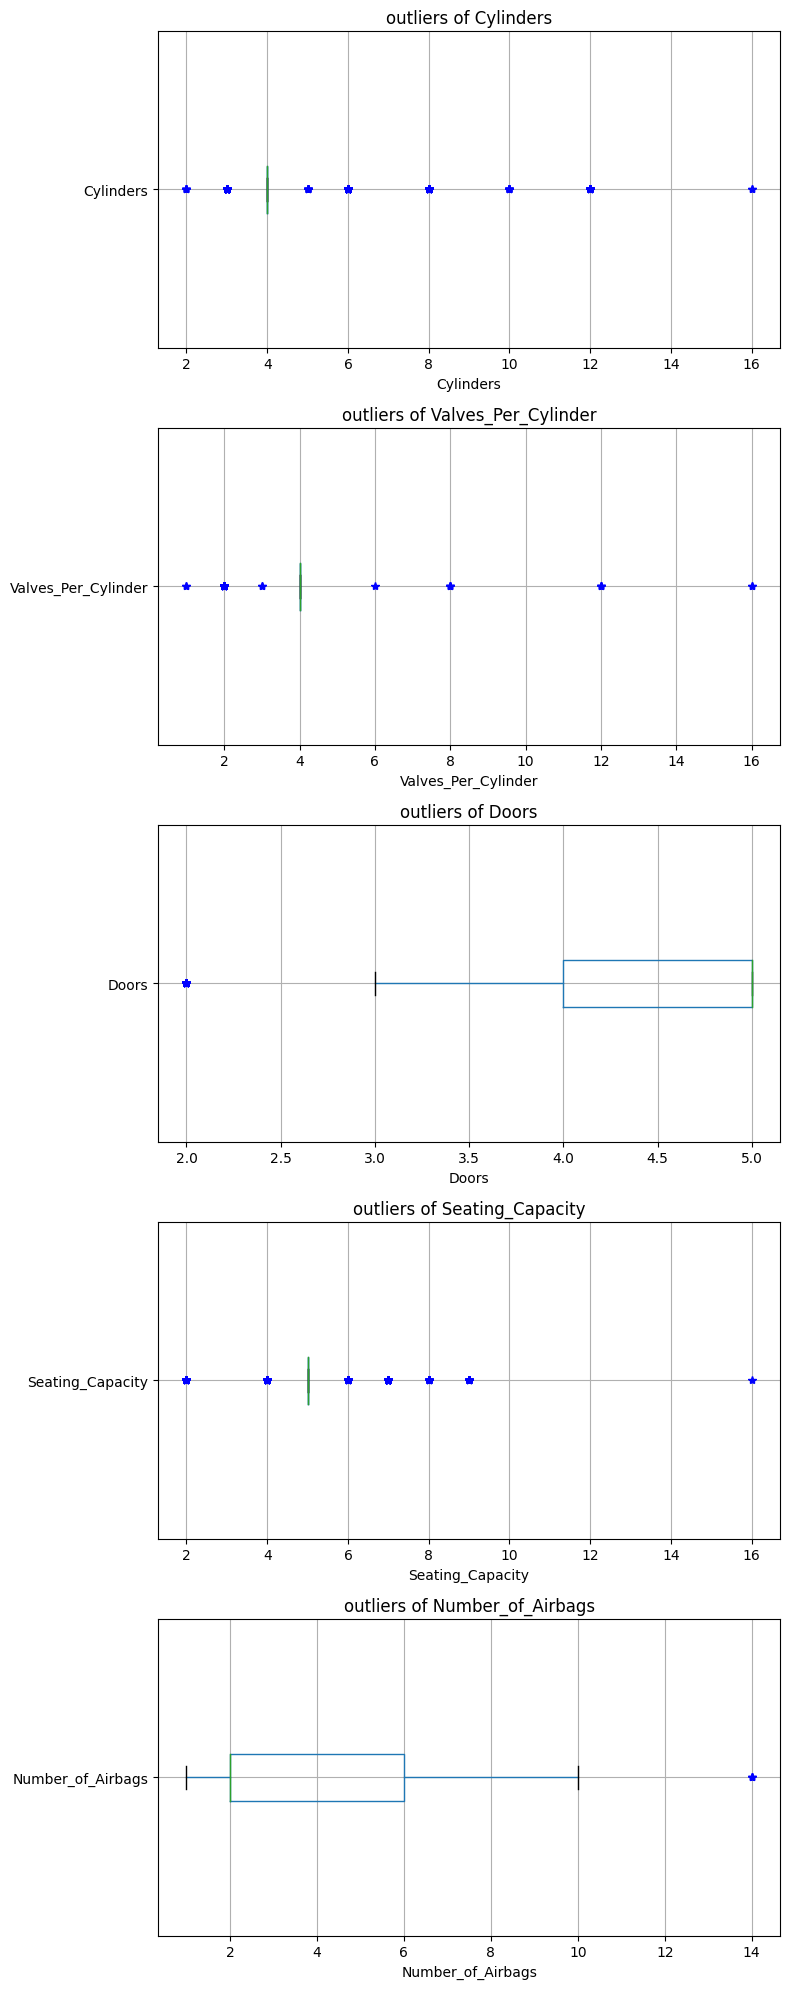

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

num_plots = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))
for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i], vert=False, sym='b*')
    axes[i].set_title(f'outliers of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [ ]:
df['Ex-Showroom_Price'] = pd.to_numeric(df['Ex-Showroom_Price'], errors='coerce').astype('Int64')

In [ ]:
df.corr()

<ipython-input-162-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
Ex-Showroom_Price,1.000000,0.817001,0.029753,-0.460311,-0.307150,0.335710
Cylinders,0.817001,1.000000,-0.001578,-0.501299,-0.313152,0.448188
Valves_Per_Cylinder,0.029753,-0.001578,1.000000,-0.028428,-0.023182,0.091972
Doors,-0.460311,-0.501299,-0.028428,1.000000,0.520719,-0.202006
Seating_Capacity,-0.307150,-0.313152,-0.023182,0.520719,1.000000,-0.043493
Number_of_Airbags,0.335710,0.448188,0.091972,-0.202006,-0.043493,1.000000


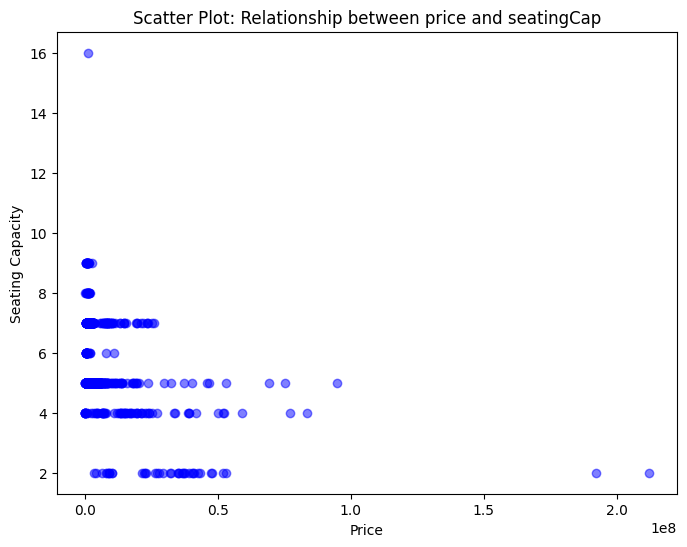

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Ex-Showroom_Price'], df['Seating_Capacity'], alpha=0.5, color='blue')

plt.title('Relationship between price and seatingCap')
plt.xlabel('Price')
plt.ylabel('Seating Capacity')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


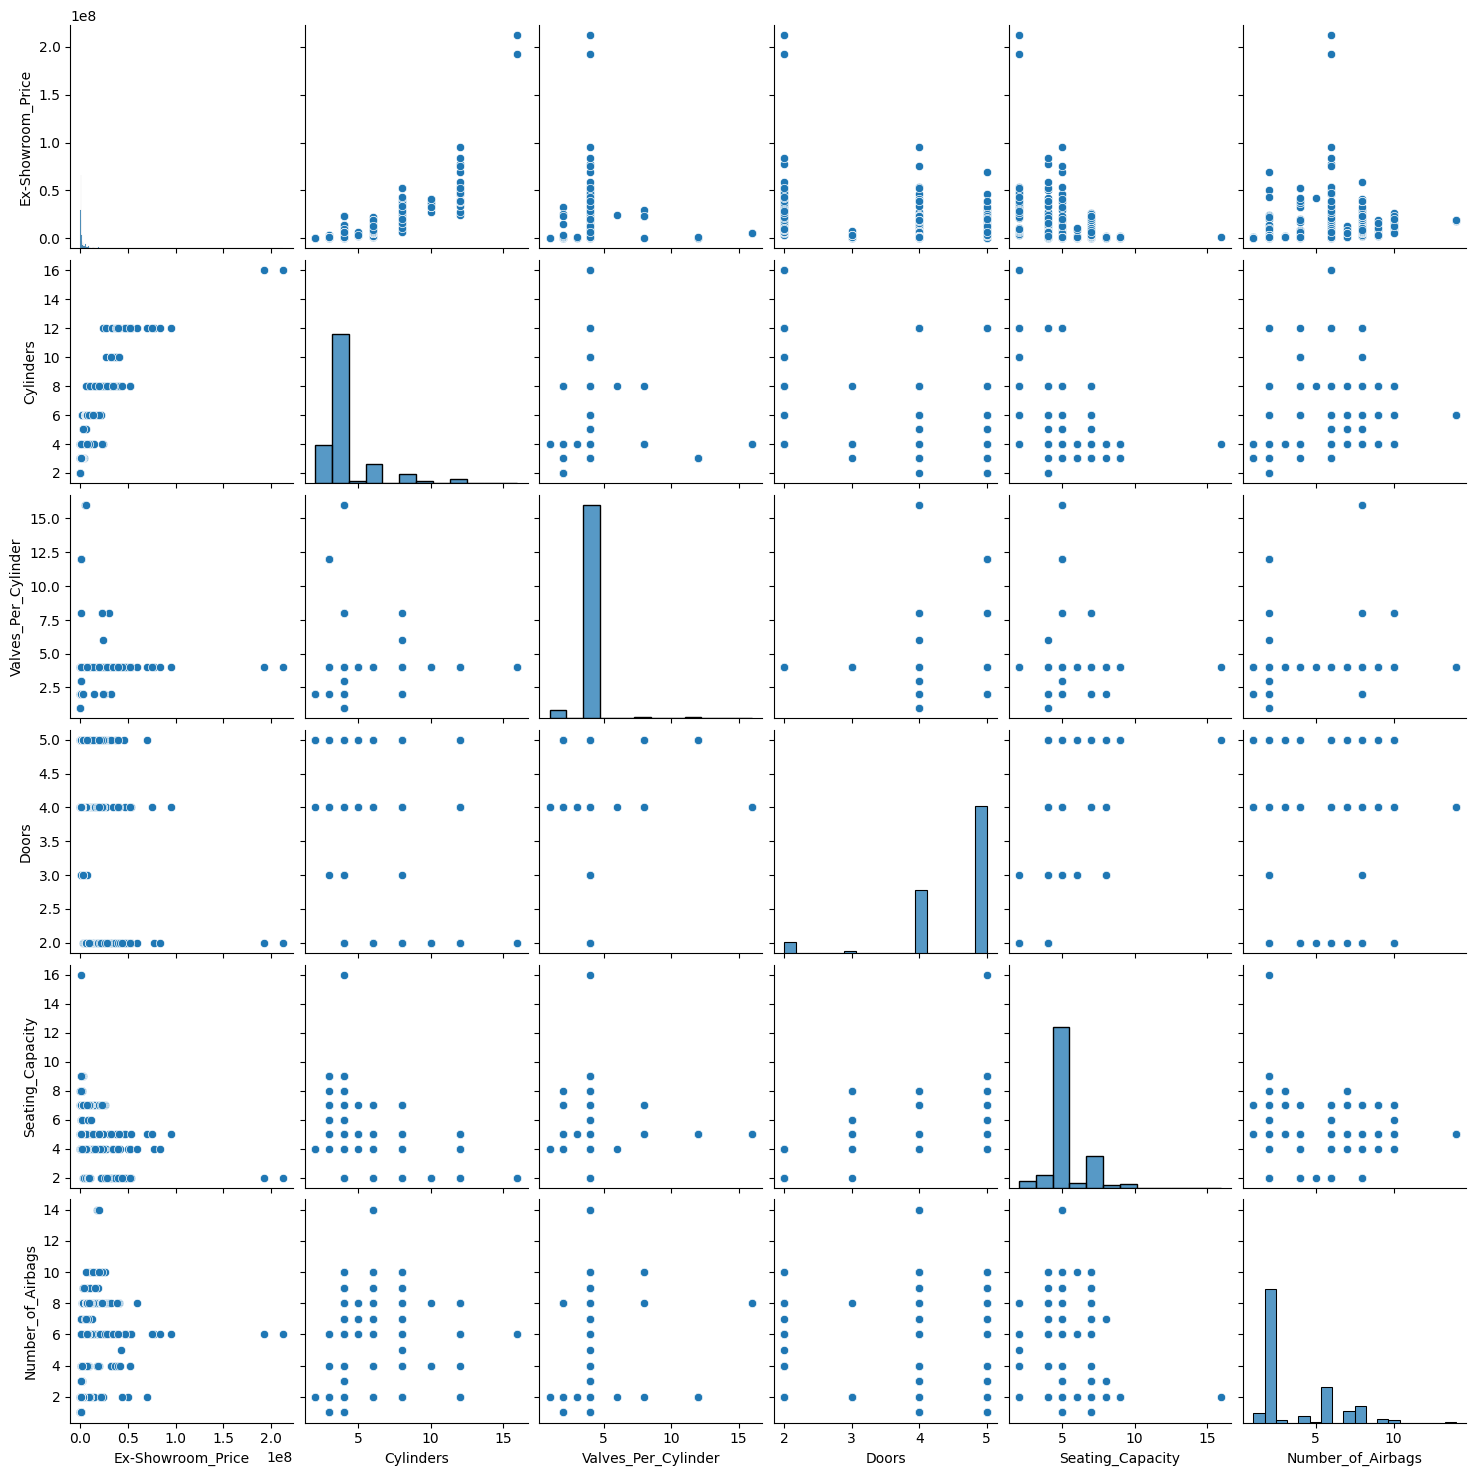

In [ ]:
numeric_dfs = ["Ex-Showroom_Price","Cylinders","Valves_Per_Cylinder","Doors","Seating_Capacity","Number_of_Airbags"]
sns.pairplot(df[numeric_dfs])

<ipython-input-166-4f5d495d0b95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


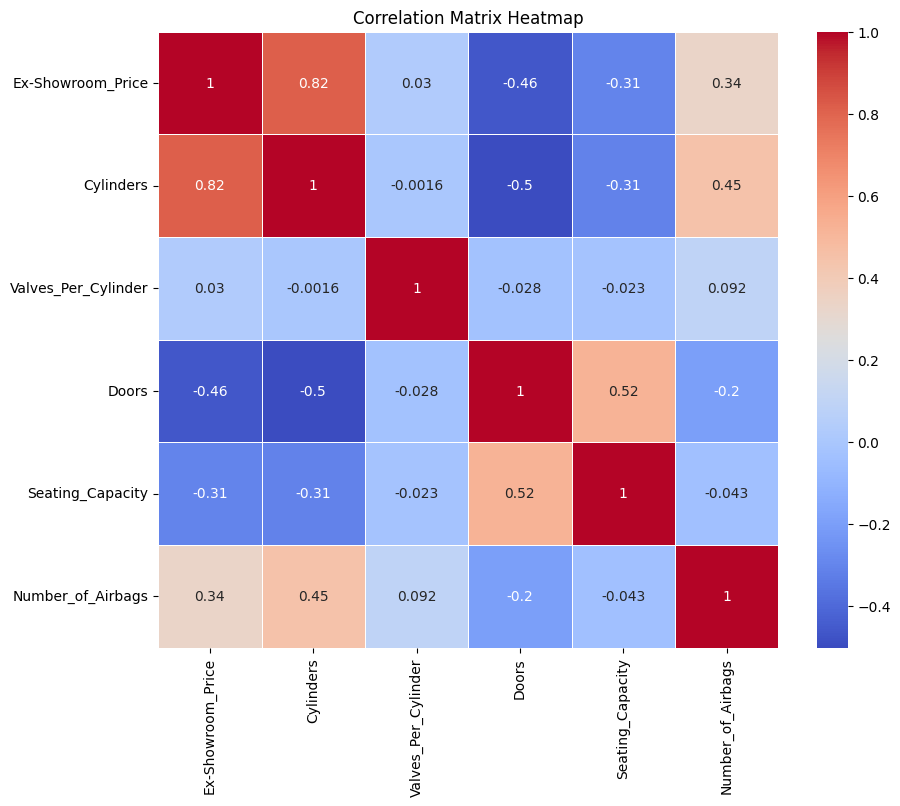

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


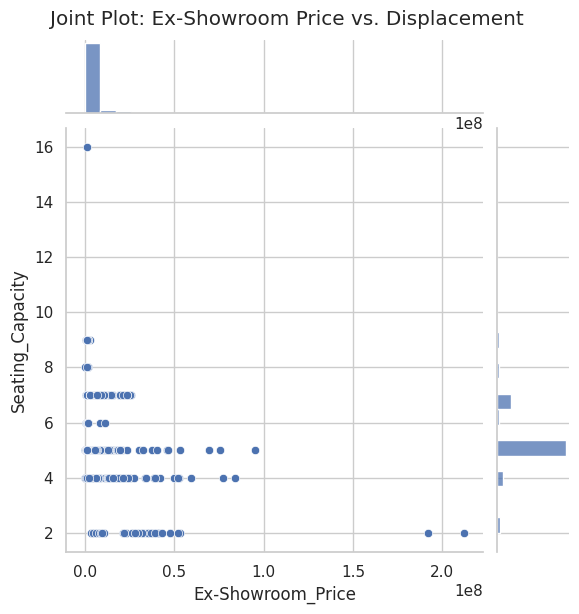

In [ ]:
sns.set(style="whitegrid")
sns.jointplot(x='Ex-Showroom_Price', y='Seating_Capacity', data=df[numeric_dfs], kind='scatter', marginal_kws=dict(bins=25))

plt.suptitle('Joint Plot: Ex-Showroom Price vs. Displacement', y=1.02)

plt.show()

In [ ]:
df[numeric_dfs]

,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,292667,2.0,2.0,5.0,4.0,2.0
1,236447,2.0,2.0,5.0,4.0,2.0
2,296661,2.0,2.0,4.0,4.0,2.0
3,334768,2.0,2.0,5.0,4.0,2.0
4,272223,2.0,2.0,5.0,4.0,2.0
...,...,...,...,...,...,...
1271,1302000,4.0,4.0,4.0,5.0,2.0
1272,1421000,4.0,4.0,4.0,5.0,6.0
1273,1431000,4.0,4.0,4.0,5.0,6.0
1274,1201000,4.0,4.0,4.0,5.0,2.0


In [ ]:
df['Displacement'] = df['Displacement'].str.replace(" cc","")

In [ ]:
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce').astype('Int64')

<ipython-input-181-b7e078e9fc0b>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_column, y=numeric_column, data=subset_df, ci=None)


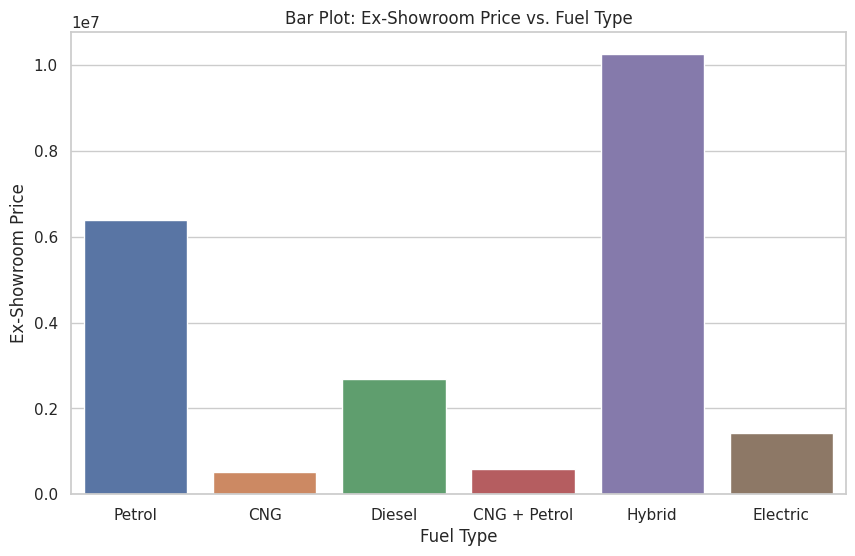

In [ ]:
categorical_column = 'Fuel_Type'
numeric_column = 'Ex-Showroom_Price'
subset_df = df[[categorical_column, numeric_column]]

plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_column, y=numeric_column, data=subset_df, ci=None)

plt.xlabel('Fuel Type')
plt.ylabel('Ex-Showroom Price')
plt.title('Bar Plot: Ex-Showroom Price vs. Fuel Type')

plt.show()

In [ ]:
grouped_df = df.groupby('Fuel_Type').mean() * 100

<ipython-input-189-acb7b82fa579>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby('Fuel_Type').mean() * 100


<Figure size 1000x600 with 0 Axes>

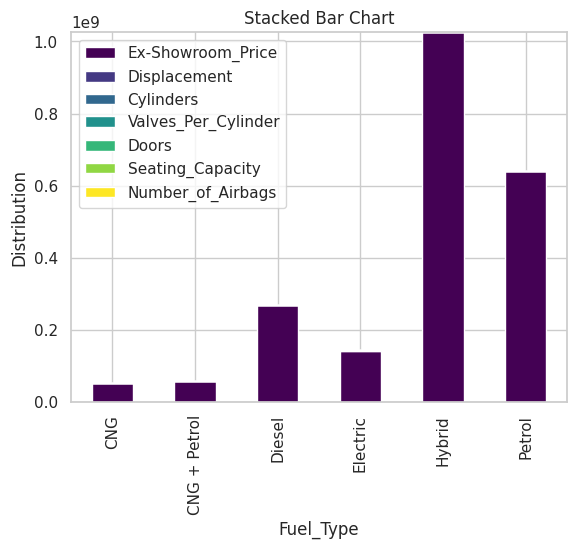

In [ ]:
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Fuel_Type')
plt.ylabel('Distribution')
plt.title('Stacked Bar Chart')

plt.show()

In [ ]:
# Results:
# Univariate conclusion are drawn from single variable
# Bivariate conclusion are drawn from double variable and relationship between variable